<a href="https://colab.research.google.com/github/m0fauzi/BEP2073_S22/blob/main/Lec_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
class operation:
  R = 8.143
  def Sum(self,x,y):
    return x + y

In [10]:
f = operation()
x = int(input('x = '))
y = int(input('y = '))
ans = f.Sum(x,y)
print(ans)

print(f.R)

x = 1
y = 2
3
8.143


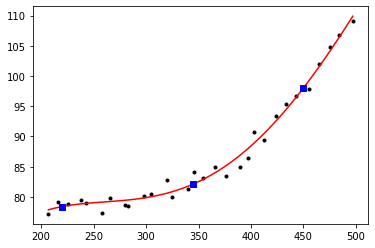

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so

data = pd.read_csv('data7_2.csv')
T = data.Temp
C = data.Cp

def f(T,a0,a1,a2,a3,a4):
  return a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 

a,c = so.curve_fit(f,T,C)
a0,a1,a2,a3,a4 = a

x = np.linspace(min(T),max(T),100)
y = f(x,a0,a1,a2,a3,a4)

plt.plot(T,C,'k.')
plt.plot(x,y,'r-')

for T in [220,345,450]:
  plt.plot(T,f(T,a0,a1,a2,a3,a4),'bs')



In [26]:
#AI

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

trn_Data = data.sample(frac = 0.8, random_state = 0)
test_Data = data.drop(trn_Data.index)


model = keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1)])

input = trn_Data
target = trn_Data.pop('Cp')

model.compile(loss='mean_absolute_error',optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))

model.fit(input,target,validation_split = 0.2, 
          verbose = 0, epochs = 100)

print(model.weights)


[<tf.Variable 'dense_12/kernel:0' shape=(1, 4) dtype=float32, numpy=
array([[-0.39767003, -0.04614115, -0.06327474, -0.8868767 ]],
      dtype=float32)>, <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.19461238, -0.69631076, -0.8515262 , -0.36192656],
       [ 0.5942376 , -0.49438557,  0.51309997, -0.1194787 ],
       [-0.0732426 ,  0.5300755 , -0.5789156 ,  0.8267477 ],
       [ 0.834609  , -0.71060264,  0.21783191,  0.70724124]],
      dtype=float32)>, <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_14/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[-0.12523288],
       [ 0.3760513 ],
       [-0.33056957],
       [-0.01960945]], dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([9.999998], dtype=float32)>]


In [27]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 8         
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
x = pd.DataFrame([250],columns=['Temp'])
CP_hat = model.predict(input).flatten()


print(f(250,a0,a1,a2,a3,a4))
#print(CP_hat)

1/1 [==============================] - 0s 14ms/step
79.03586066899359
